In [11]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 


In [12]:
df = pd.read_csv("customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
x = df[['Gender', 'Age', 'Annual Income (k$)']]
x = pd.get_dummies(x, drop_first=True)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = x_scaled

In [53]:
y = np.asarray(df["Spending Score (1-100)"])


In [51]:
agglom = AgglomerativeClustering(n_clusters =20, linkage = 'ward' )

In [52]:
agglom.fit(x,y)

AgglomerativeClustering(n_clusters=20)

In [41]:
dist_matrix = distance_matrix(x,x) 
print(dist_matrix)

[[0.         0.14353338 2.01619665 ... 4.33831279 4.74921111 4.72311171]
 [0.14353338 0.         2.01619665 ... 4.30972573 4.72311171 4.70125153]
 [2.01619665 2.01619665 0.         ... 4.73589082 5.11181556 5.08960098]
 ...
 [4.33831279 4.30972573 4.73589082 ... 0.         0.41986372 0.44371993]
 [4.74921111 4.72311171 5.11181556 ... 0.41986372 0.         0.14353338]
 [4.72311171 4.70125153 5.08960098 ... 0.44371993 0.14353338 0.        ]]


In [49]:
Z = hierarchy.linkage(dist_matrix, 'ward')

C:\Users\barsam\AppData\Local\Temp\ipykernel_10032\754319337.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'ward')


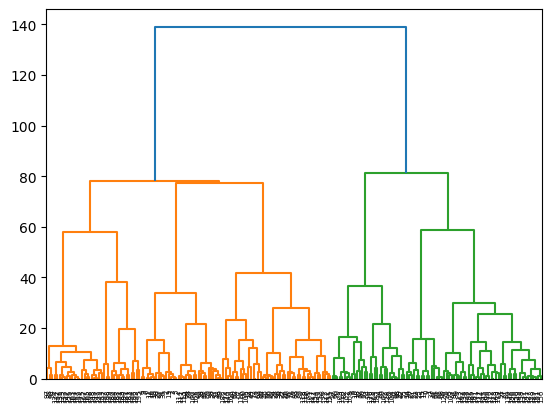

In [50]:
dendro = hierarchy.dendrogram(Z)